## Testing the BPASS isochrone at 10^8.2 years age. (Solar Metallicity)
In this BPASS isochrone and cluster plot, I go over the BPASS isochrone for 10^8.2 years age, solar metallicity, AKs=0.6, and distance of 1000 parsecs from Earth. From the isochrone and cluster, we discuss several plots such as the log_g frequency distribution of the isochrone, the color magnitude diagram (B-V vs pseudo-M_V), and the mass luminosity relationshi of the cluster. **Note that I say pseudo-M_V as it is the absoulte magnitude but NOT accounting for extinction**

Formula for pseudo M_V is

pseudo-M_V = V - $log_{10}$(distance to cluster/(10 pc))

Other notes:

I have chosen dist to cluster = 100 pc as this power of 10 makes base-10 logarithms a bit easier to do and understand. After all, it was one of the default parameters in the SPISEA paper's example of the isochrone input parameters. I also use the Parsec evolution models in order to make sure that 

## Note: This notebook can also be used for demonstration of how to use the new Isochrone_Binary and Binary_Cluster

In [1]:
import spisea
from spisea import evolution, synthetic
import math
# Check if the evolution class works fine
import time
t1=time.time()
bps=evolution.BPASS()
iso1=synthetic.Isochrone_Binary(8.2, 0.0, 100,math.log10(1), mass_sampling=1, filepath='/g/lu/scratch/ryotainagaki/BPASS_iso_filesTimedIsolated/')

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:346: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1771: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = geta

Changing to logg=5.00 for T= 38774 logg=8.52
Changing to logg=5.00 for T= 38361 logg=8.50
Changing to T= 50000 for T= 52330 logg=8.47
Changing to logg=5.00 for T= 52330 logg=8.47
Changing to logg=5.00 for T= 44758 logg=8.49
Changing to logg=5.00 for T= 36146 logg=8.54
Changing to T= 50000 for T= 73161 logg=8.45
Changing to logg=5.00 for T= 73161 logg=8.45
Changing to logg=5.00 for T= 39474 logg=5.51
Changing to logg=5.00 for T= 41390 logg=5.50
Changing to logg=5.00 for T= 45668 logg=8.52
Changing to logg=5.00 for T= 35040 logg=8.49
Changing to logg=5.00 for T= 38030 logg=5.41
Changing to logg=5.00 for T= 37690 logg=5.71
Changing to logg=5.00 for T= 45668 logg=8.52
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 34113 logg=5.11
Changing to logg=5.00 for T= 45668 logg=8.52
Changing to logg=5.00 for T= 38260 logg=5.41
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 45668 logg=8.52
Changing to logg=5.00 for T= 38751 logg=8.52
Changing to 

Changing to logg=5.00 for T= 39086 logg=5.37
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 38810 logg=5.36
Changing to logg=5.00 for T= 37547 logg=5.70
Changing to logg=5.00 for T= 45668 logg=8.52
Changing to logg=5.00 for T= 39842 logg=5.51
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 37225 logg=5.46
Changing to logg=5.00 for T= 39097 logg=5.40
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 42302 logg=8.53
Changing to logg=5.00 for T= 38868 logg=5.45
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 42302 logg=8.53
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 42300 logg=8.53
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 38205 logg=5.40
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 45668 logg=8.52
Changing to logg=5.00 for T= 33657 logg=5.67
Changing t

M =   1.400 Msun  T =   nan K  m_ubv_U =  nan
M =   3.981 Msun  T =   nan K  m_ubv_U =  nan
M =   4.000 Msun  T = 11784 K  m_ubv_U = 13.00
M =   2.300 Msun  T = 11477 K  m_ubv_U = 12.80
M =   6.000 Msun  T = 33052 K  m_ubv_U = 24.55
M =   6.000 Msun  T = 25617 K  m_ubv_U = 24.57
M =   4.500 Msun  T = 37645 K  m_ubv_U = 23.52
M =   4.000 Msun  T = 11805 K  m_ubv_U = 13.00
M =   2.500 Msun  T = 10121 K  m_ubv_U = 15.50
M =   7.500 Msun  T = 25626 K  m_ubv_U = 24.37
M =   0.501 Msun  T =   nan K  m_ubv_U =  nan
M =   1.000 Msun  T =   nan K  m_ubv_U =  nan
M =   4.500 Msun  T = 47516 K  m_ubv_U = 24.23
M =   0.631 Msun  T =   nan K  m_ubv_U =  nan
M =   3.500 Msun  T = 12112 K  m_ubv_U = 13.91
M =   5.000 Msun  T = 30594 K  m_ubv_U = 23.96
M =   0.398 Msun  T =   nan K  m_ubv_U =  nan
M =   0.631 Msun  T =   nan K  m_ubv_U =  nan
M =   0.631 Msun  T =   nan K  m_ubv_U =  nan
M =   3.700 Msun  T = 12181 K  m_ubv_U = 13.56
M =   4.500 Msun  T =  4524 K  m_ubv_U = 14.74
M =   0.501 Msun  T =

Primaries
M =   5.500 Msun  T = 27347 K  m_ubv_R = 22.81
M =   3.500 Msun  T = 12112 K  m_ubv_R = 11.53
M =   1.400 Msun  T =   nan K  m_ubv_R =  nan
M =   3.981 Msun  T =   nan K  m_ubv_R =  nan
M =   4.000 Msun  T = 11784 K  m_ubv_R = 10.60
M =   2.300 Msun  T = 11477 K  m_ubv_R = 10.36
M =   6.000 Msun  T = 33052 K  m_ubv_R = 23.18
M =   6.000 Msun  T = 25617 K  m_ubv_R = 22.96
M =   4.500 Msun  T = 37645 K  m_ubv_R = 22.24
M =   4.000 Msun  T = 11805 K  m_ubv_R = 10.60
M =   2.500 Msun  T = 10121 K  m_ubv_R = 12.76
M =   7.500 Msun  T = 25626 K  m_ubv_R = 22.76
M =   0.501 Msun  T =   nan K  m_ubv_R =  nan
M =   1.000 Msun  T =   nan K  m_ubv_R =  nan
M =   4.500 Msun  T = 47516 K  m_ubv_R = 23.00
M =   0.631 Msun  T =   nan K  m_ubv_R =  nan
M =   3.500 Msun  T = 12112 K  m_ubv_R = 11.53
M =   5.000 Msun  T = 30594 K  m_ubv_R = 22.53
M =   0.398 Msun  T =   nan K  m_ubv_R =  nan
M =   0.631 Msun  T =   nan K  m_ubv_R =  nan
M =   0.631 Msun  T =   nan K  m_ubv_R =  nan
M =   3.700

For a sanity check, we can see that the primaries, secondaries, and single stars have phasees of 5 or of 101. This is since we haven't added neutron stars or black holes yet. Stars with phase of -99 exist, and those are the secondary stars that have already merged.

In [2]:
import numpy as np
np.all([(x==5 or x==101) for x in iso1.primaries['phase']])

False

In [3]:
np.unique(iso1.primaries['phase'])

5.0
101.0
110.0


In [4]:
iso1.primaries[np.where((iso1.primaries['Teff']==0.0) & (iso1.primaries['logg']==0))]

mass,L,Teff,R,logg,isWR,mass_current,phase,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,W,K,m,,,solMass,,,,,,,
float64,float64,float64,float64,float64,bool,float64,float64,int64,float64,float64,float64,float64,float64


In [5]:
np.all([(x==5 or x==101) for x in iso1.singles['phase']])

True

In [6]:
np.all([(x==5 or x==101 or x==-99) for x in iso1.secondaries['phase']])

True

Find the maximum value of logg (cgs) for primaries, single stars, and secondaries. It turns out we have outliers for the secondaries

In [7]:
np.max(iso1.singles['logg'])

9.294869501162154

In [8]:
np.max(iso1.primaries['logg'])

nan

In [9]:
np.max(np.nan_to_num(iso1.secondaries['logg']))

9.283702439639246

Now let's find the median logg values for the single stars, secondary stars, and the primary stars

In [10]:
np.median(iso1.singles['logg'])

4.2498758947769355

In [11]:
np.median(iso1.primaries['logg'])

nan

In [12]:
np.median([x for x in iso1.secondaries['logg'] if np.isfinite(x)])

4.298445675989428

Let's make a histogram of log_g values for each table of the isochrone

Text(0.5, 0, 'logg in cgs')

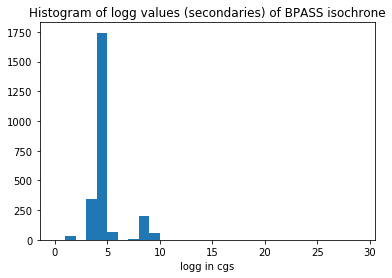

In [13]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (secondaries) of BPASS isochrone")
plt.hist(np.array([x for x in iso1.secondaries['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

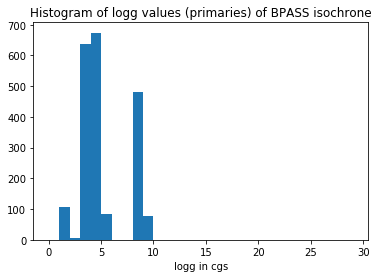

In [14]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (primaries) of BPASS isochrone")
plt.hist(np.array([x for x in iso1.primaries['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

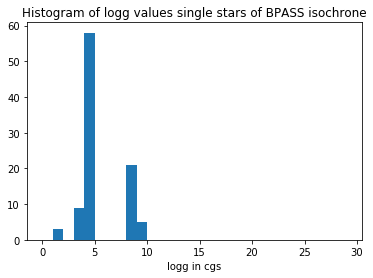

In [15]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values single stars of BPASS isochrone")
plt.hist(np.array([x for x in iso1.singles['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

For comparison, let's create a Parsec isochrone  phot using otherwise same parameters.

In [16]:
iso2=synthetic.IsochronePhot(8.2, 0.6, 100, math.log(1), evo_model=evolution.Parsec(), recomp=True) # New Parsec isochrone for same metallicity

Isochrone generation took 14.252080 s.
Making photometry for isochrone: log(t) = 8.20  AKs = 0.60  dist = 100
     Starting at:  2020-12-21 22:21:50.179745   Usually takes ~5 minutes
Starting filter: ubv,U   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2491 K  m_ubv_U = 33.66
M =   4.155 Msun  T = 11703 K  m_ubv_U = 12.50
M =   4.371 Msun  T =  4036 K  m_ubv_U = 14.94
Starting filter: ubv,B   Elapsed time: 0.43 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2491 K  m_ubv_B = 33.97
M =   4.155 Msun  T = 11703 K  m_ubv_B = 12.82
M =   4.371 Msun  T =  4036 K  m_ubv_B = 13.50
Starting filter: ubv,V   Elapsed time: 0.85 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2491 K  m_ubv_V = 31.29
M =   4.155 Msun  T = 11703 K  m_ubv_V = 12.27
M =   4.371 Msun  T =  4036 K  m_ubv_V = 11.01
Starting filter: ubv,R   Elapsed time: 1.27 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2491 K  m_ubv_R = 25.92
M =   4.155 Msun  T

Find the maximum logg of the isochrone and the distribution of logg values

In [17]:
np.max(iso2.points['logg'])

4.8974

(array([14., 56., 26., 36., 84.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Patch objects>)

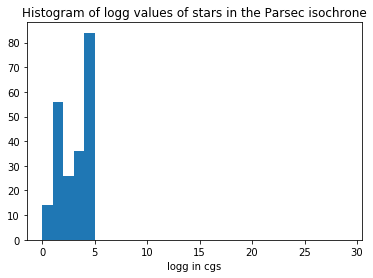

In [18]:
import matplotlib.pyplot as plt
plt.xlabel("logg in cgs")
plt.title("Histogram of logg values of stars in the Parsec isochrone")
plt.hist(np.array([x for x in iso2.points['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))

Finding the log_g median and mean for the new isochrone

In [19]:
np.median(iso2.points['logg'])

3.4698

In [20]:
np.mean(iso2.points['logg'])

3.0808240740740738

Now we want to make clusters for both of these models and plot CMD, HR Diagram, and Mass Luminosity relationship for the isochrones. Then, we want to find the Mass luminosity relationship and CMD for the cluster.

In [21]:
from spisea import imf
from spisea.imf import imf, multiplicity
from spisea import ifmr


In [22]:
clus_1=synthetic.Binary_Cluster(iso1, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()), 2000, ifmr=ifmr.IFMR_Spera15())
clus_2=synthetic.ResolvedCluster(iso2, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()), 2000, ifmr=ifmr.IFMR_Spera15())

647.4200000000003


/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(super(), op)(other)


Found 10 companions out of stellar mass range


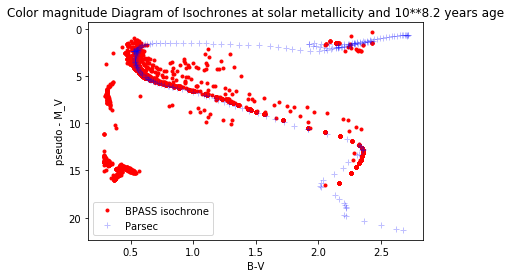

In [23]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"], iso1.primaries["m_ubv_V"]-5*np.log10(100), "r.")
plt.plot(iso1.secondaries['m_ubv_B']-iso1.secondaries["m_ubv_V"], iso1.secondaries["m_ubv_V"]-5*np.log10(100), "r.")
plt.plot(iso1.singles['m_ubv_B']-iso1.singles["m_ubv_V"], iso1.singles["m_ubv_V"]-5*np.log10(100), "r.", label="BPASS isochrone")
plt.plot(iso2.points['m_ubv_B']-iso2.points["m_ubv_V"], iso2.points["m_ubv_V"]-5*np.log10(100), "b+", label="Parsec", alpha=0.25)
plt.xlabel("B-V")
plt.ylabel("pseudo - M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 10**8.2 years age")
plt.gca().invert_yaxis()
plt.legend()

In [24]:
np.min(([x-10 for x in iso1.secondaries["m_ubv_V"] if np.isfinite(x)]))

0.988515806822905

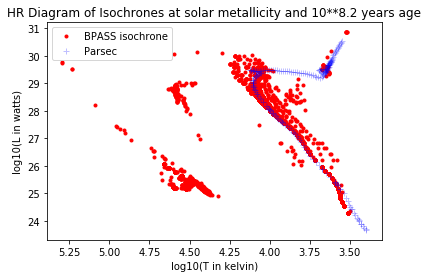

In [25]:
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['Teff']), np.log10(iso1.primaries["L"]), "r.")
plt.plot(np.log10(iso1.secondaries['Teff']), np.log10(iso1.secondaries["L"]), "r.")
plt.plot(np.log10(iso1.singles['Teff']), np.log10(iso1.singles["L"]), "r.", label="BPASS isochrone")
plt.plot(np.log10(iso2.points['Teff']), np.log10(iso2.points["L"]), "b+", label="Parsec", alpha=0.25)
plt.xlabel("log10(T in kelvin)")
plt.ylabel("log10(L in watts)")
plt.title("HR Diagram of Isochrones at solar metallicity and 10**8.2 years age")
plt.gca().invert_xaxis()
plt.legend()
# Rough pattern seems to fit. What's that line?

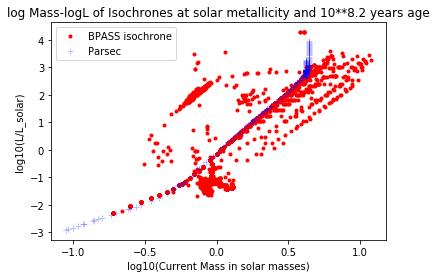

In [26]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['mass_current']), np.log10(iso1.primaries["L"]/cs.L_sun), "r.")
plt.plot(np.log10(iso1.secondaries['mass_current']), np.log10(iso1.secondaries["L"]/cs.L_sun), "r.")
plt.plot(np.log10(iso1.singles['mass_current']), np.log10(iso1.singles["L"]/cs.L_sun), "r.", label="BPASS isochrone")
plt.plot(np.log10(iso2.points['mass_current']), np.log10(iso2.points["L"]/cs.L_sun), "b+", label="Parsec", alpha=0.25)
plt.xlabel("log10(Current Mass in solar masses)")
plt.ylabel("log10(L/L_solar)")
plt.title("log Mass-logL of Isochrones at solar metallicity and 10**8.2 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

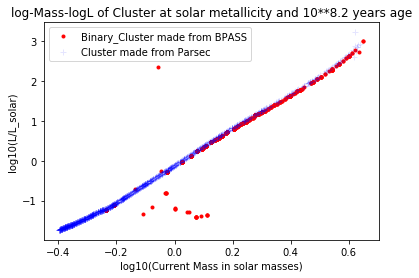

In [27]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
from astropy import units as u
import matplotlib.pyplot as plt
plt.plot(np.log10(clus_1.star_systems['mass_current']), np.log10(clus_1.star_systems["L"]/cs.L_sun), "r.", label="Binary_Cluster made from BPASS", alpha =1)
plt.plot(np.log10(clus_2.star_systems['mass_current']), np.log10(clus_2.star_systems["L"]/(cs.L_sun*1/u.W)), "b+", label="Cluster made from Parsec", alpha=0.1)
plt.xlabel("log10(Current Mass in solar masses)")
plt.ylabel("log10(L/L_solar)")
plt.title("log-Mass-logL of Cluster at solar metallicity and 10**8.2 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

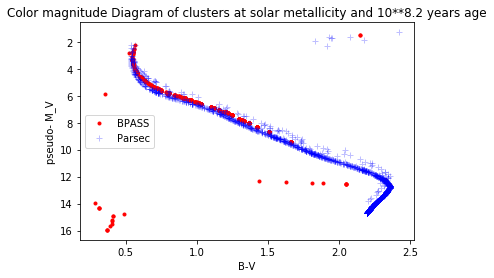

In [28]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(clus_1.star_systems['m_ubv_B']-clus_1.star_systems["m_ubv_V"], clus_1.star_systems["m_ubv_V"]-5*np.log10(100), "r.",label="BPASS")
plt.plot(clus_2.star_systems['m_ubv_B']-clus_2.star_systems["m_ubv_V"], clus_2.star_systems["m_ubv_V"]-5*np.log10(100), "b+", label="Parsec", alpha=0.25)
plt.xlabel("B-V")
plt.ylabel("pseudo- M_V")
plt.title("Color magnitude Diagram of clusters at solar metallicity and 10**8.2 years age")
plt.gca().invert_yaxis()
plt.legend()

One thing to note about the Binary_Cluster is that it does include the units as information for columns.
The usual ResolvedCluster does not. Thus the latter has a disadvantage when we do comparisons with solar luminosity.

Looking at the total mass of the cluster

In [29]:
clus_1.star_systems['systemMass'].sum()

1370.864829741225

The total mass needs to be recalculated in order for things to work.